# Dataset

- Dataset downloaded fr. Kaggle.com.
- Includes information on Cardiovascular Disease and related risk factors. 
- Utilizing a simple Machine Learning algorithm we can potentially detect and predict the risk for heart disease in a patient, which can be used to flag
 individuals at risk at initiate risk reducing medical measures.


## Feature Information

Attribute Information

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

- Source : https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [164]:
import pandas as pd
import seaborn as sns

heart_disease = pd.read_csv('heart.csv')

heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Problem Formulation

- Can we training a machine learning algorithm to predict the prevalence of heart disease in a sample of patients, generalize the findings and estimate the risk of heart disease in a new sample of patients?


# Data Visualization

In [165]:
# Setting palette

colors = ["#fee6ce", "#fdae6b", "#e6550d"]
sns.set_palette(sns.color_palette('tab20c'))

## Data Composition

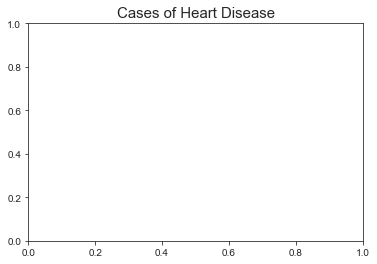

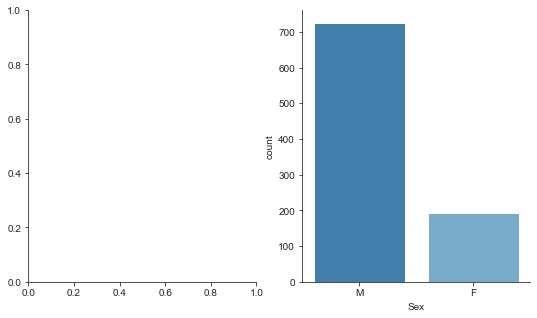

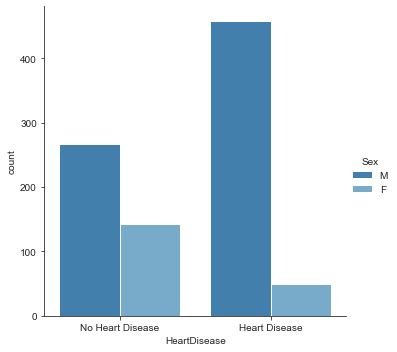

In [365]:
import matplotlib.pyplot as plt

# Configurating plot
sns.set_style("ticks")
plt.title("Cases of Heart Disease", fontsize = 15)
# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))


m_f = sns.countplot(data = heart_disease, x = 'Sex')
sns.despine()
share_of_total = heart_disease['HeartDisease'].value_counts(normalize=True)
share_of_total
g = sns.catplot(data = heart_disease, x = 'HeartDisease', hue = 'Sex', kind = 'count')
g.set_xticklabels(["No Heart Disease", "Heart Disease"])
sns.despine()


In [420]:
# Share of total

HeartDisease_sha = heart_disease.HeartDisease.value_counts(normalize=True)

# Share of men and women with Heart Disease

HeartDisease_sex = heart_disease.groupby('HeartDisease').Sex.value_counts(normalize=True)
print(HeartDisease_sex)

age_groups = pd.cut(heart_disease['Age'], bins=[0, 20, 30, 40, 50, 65, 100]).value_counts(normalize=True)
print(age_groups)
#HeartDisease_age = heart_disease.groupby('HeartDisease').Age.value_counts(normalize=True)
#print(HeartDisease_sex)

HeartDisease  Sex
0             M      0.651220
              F      0.348780
1             M      0.901575
              F      0.098425
Name: Sex, dtype: float64
(50, 65]     0.566449
(40, 50]     0.242919
(30, 40]     0.095861
(65, 100]    0.089325
(20, 30]     0.005447
(0, 20]      0.000000
Name: Age, dtype: float64


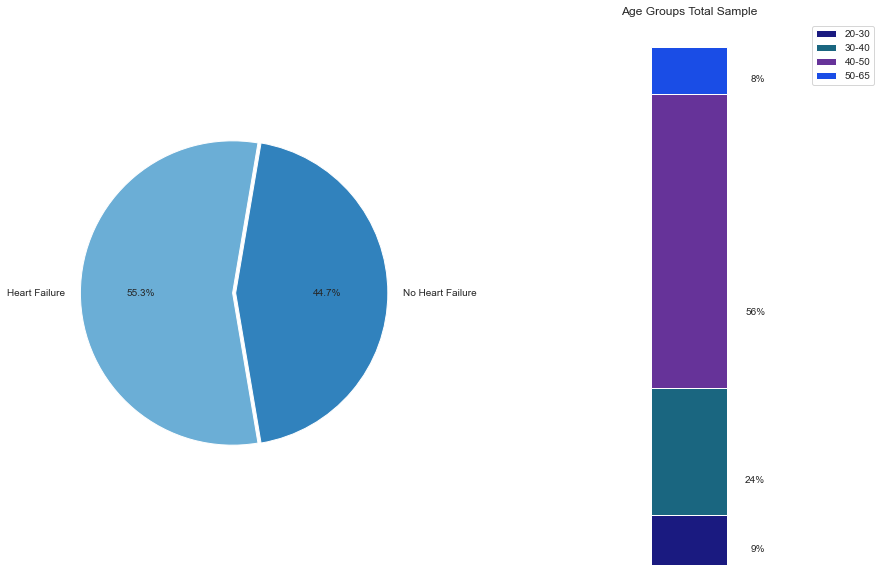

In [405]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np


# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
plt.title("Cases of Heart Failure", fontsize = 20)

# pie chart parameters
ratios = [0.446623, 0.553377]
labels = ['No Heart Failure', 'Heart Failure']
explode = [0.02, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [0.095861,0.242919, 0.566449, 0.089325]
width = .2
colors = [[.1, 0.1, .5], [.1, .4, .5], [.4, .2, .6], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 4
    bottom += height
    ax2.text(xpos+0.2, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='right')

ax2.set_title('Age Groups Total Sample')
ax2.legend(('20-30', '30-40', '40-50', '50-65', '65+'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)




plt.show()

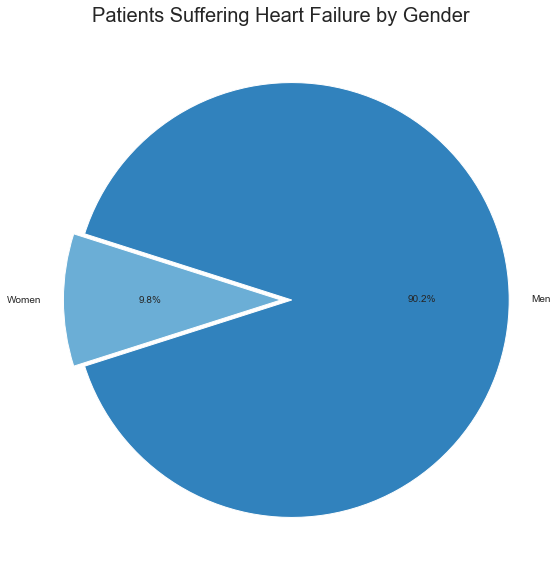

In [423]:
# Pie Chart Men and Women given that they have heart disease

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np


# Share of men and women with Heart Disease

heart_disease.groupby('Sex').HeartDisease



# make figure and assign axis objects
fig, (ax1) = plt.subplots(1, figsize=(15, 10))
fig.subplots_adjust(wspace=0)
plt.title("Patients Suffering Heart Failure by Gender", fontsize = 20)

# pie chart parameters
ratios = [0.901575, 0.098425]
labels = ['Men', 'Women']
explode = [0.05, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [0.095861,0.242919, 0.566449, 0.089325]
width = .2
colors = [[.1, 0.1, .5], [.1, .2, .5], [.4, .2, .6], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos+0.2, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='right')

ax2.set_title('Age Group Distribution')
ax2.legend(('20-30', '30-40', '40-50', '50-65', '65+'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)



plt.show()

0

## Focusing on patients having a Heart Disease

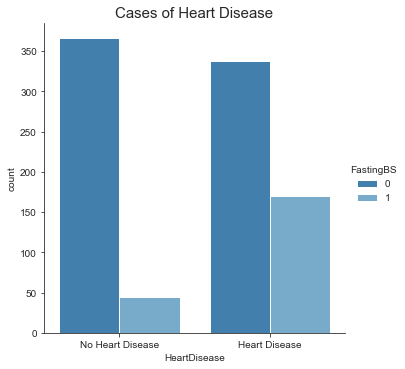

In [325]:
g2 = sns.catplot(data = heart_disease, x = 'HeartDisease', hue = 'FastingBS', kind = 'count')
plt.title("Cases of Heart Disease", fontsize = 15)
g2.set_xticklabels(["No Heart Disease", "Heart Disease"])

# Training the model

In [6]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
heart_disease.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## Adjusting Columns to Enable Analysis

In [15]:
## Multiple Columns to take into consideration:

## Code yes/no binary columns to 1 for yes and 0 for no. 

heart_disease['ExerciseAngina'].replace({"Y":1, "N":0}, inplace = True)

heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0


## Targets and Features

In [26]:
# Specifying target/feature variables

target = 'HeartDisease'
y = heart_disease[target]
X = heart_disease.drop(target, axis = 1)

## Train/Test Split

In [1]:
# Importing necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

# Defining preprocessing functions
scaler = StandardScaler()
dummifier = OneHotEncoder(drop = 'if_binary')

# Split into train and test. Until final stage, only focus on the train set.
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Specify numbers and categories columns

# Numbers
num_cols = X.select_dtypes('number').columns
num_trans = make_pipeline(scaler)

# Categories
cat_cols = X.select_dtypes('object').columns
cat_trans = make_pipeline(dummifier)


# Finalizing preprocessing by transforming columns into a single feature space.
preprocessor = make_column_transformer((num_trans, num_cols),
                                       (cat_trans, cat_cols),
)
# Create list of potential models to loop over
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

classifier = [LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

num_features = make_column_selector(dtype_include = 'number')
num_transformer = make_pipeline(StandardScaler()
    )

#preprocessor = 
# Create pipeline by employing previously defined functions in pipeline
# utlizing the Cross Validation function built into the GridSearch.


##for i in classifier:
    
    #pipe = make_pipeline(preprocessor, i)
    #grid = GridSearchCV(pipe, param_grid = {}, cv = 5, scoring = 'accuracy')
    #grid.fit(X_train,y_train)
    #best_score = grid.best_score_
    #print(f'Classifying Model: {i},\nScore: {best_score}\n')

NameError: name 'X' is not defined

## Comments: 

- Having tested different models by looping over them in the model selection phase, we see that the model with the best score (using CrossValidation) is the Supported Vector Model.
- We are not fully done yet though. We can move on by tuning the Hyper Parameter of the GridSearch specified as param_grid.

# Hyper Parameter Tuning

In [91]:
# Importing necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV


# Defining preprocessing functions
scaler = StandardScaler()
dummifier = OneHotEncoder(drop = 'if_binary')

# Split into train and test. Until final stage, only focus on the train set.
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Specify numbers and categories columns

# Numbers
num_cols = X.select_dtypes('number').columns
num_trans = make_pipeline(scaler)

# Categories
cat_cols = X.select_dtypes('object').columns
cat_trans = make_pipeline(dummifier)


# Finalizing preprocessing by transforming columns into a single feature space.
preprocessor = make_column_transformer((num_trans, num_cols),
                                       (cat_trans, cat_cols),
)
# Create list of potential models to loop over
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


classifier = [LogisticRegression(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

# Create pipeline by employing previously defined functions in pipeline
# utlizing the Cross Validation function built into the GridSearch.


# Importing necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV

# Defining preprocessing functions
scaler = StandardScaler()
dummifier = OneHotEncoder(drop = 'if_binary')

# Split into train and test. Until final stage, only focus on the train set.
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    random_state = 42)

# Specify numbers and categories columns

# Numbers
num_cols = X.select_dtypes('number').columns
num_trans = make_pipeline(scaler)

# Categories
cat_cols = X.select_dtypes('object').columns
cat_trans = make_pipeline(dummifier)


# Finalizing preprocessing by transforming columns into a single feature space.
preprocessor = make_column_transformer((num_trans, num_cols),
                                       (cat_trans, cat_cols),
)

param_grid = {'svc__C': [0.1, 1, 10, 100, 1000]}
classifier = SVC()

# Create pipeline by employing previously defined functions in pipeline
# utlizing the Cross Validation function built into the GridSearch.



pipe = make_pipeline(preprocessor, classifier)
grid = GridSearchCV(pipe, param_grid = param_grid, cv = 5,
                    scoring = 'accuracy')
grid.fit(X_train,y_train)
best_score = grid.best_score_
best_params = grid.best_params_

print(f'Classifying Model: {classifier},\nAccuracy Score: {best_score}\nParameter: {best_params}\n')

Classifying Model: SVC(),
Accuracy Score: 0.8705526046034852
Parameter: {'svc__C': 1}



# Fitting and Evaluating

## Running Model on Test Data

In [206]:
# Running model with test data. 

grid.score(X_test,y_test)

0.8586956521739131

/Users/jakobholmgren/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


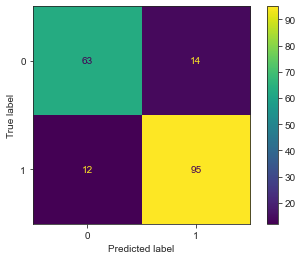

In [211]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid.best_estimator_, X_test, y_test)

## Running Model on all Data

/Users/jakobholmgren/opt/anaconda3/envs/machine-learning/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


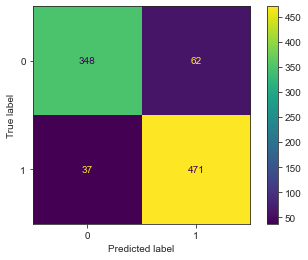

In [212]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid.best_estimator_, X, y)

# Refit best model on all data

In [219]:
model = make_pipeline(preprocessor, SVC(C = 10))

model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], dtype='object'))])),
                ('svc', SVC(C=10))])